# Python Code to Visualize a Graphical Model of Sleep, Stress, Habits, and Academic Performance

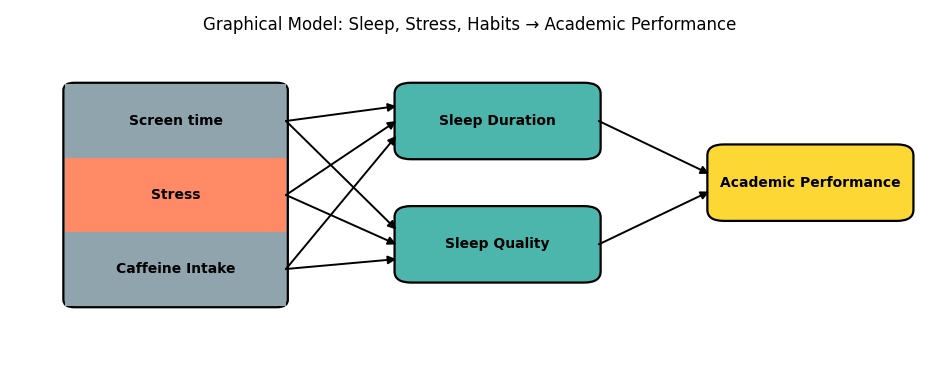

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle

# Helper functions
def rounded_box(ax, x, y, w, h, fc, ec="black", lw=1.6, r=0.08, z=2):
    """Rounded rectangle (FancyBboxPatch) in axes data coordinates."""
    patch = FancyBboxPatch(
        (x, y), w, h,
        boxstyle=f"round,pad=0.02,rounding_size={r}",
        linewidth=lw, edgecolor=ec, facecolor=fc, zorder=z
    )
    ax.add_patch(patch)
    return patch

def arrow(ax, x0, y0, x1, y1, lw=1.4, z=3):
    ax.annotate(
        "", xy=(x1, y1), xytext=(x0, y0),
        arrowprops=dict(arrowstyle="-|>", lw=lw, color="black",
                        shrinkA=0, shrinkB=0, mutation_scale=12),
        zorder=z
    )

fig, ax = plt.subplots(figsize=(9.5, 4.0))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis("off")


ax.text(5, 5.75, "Graphical Model: Sleep, Stress, Habits \u2192 Academic Performance",
        ha="center", va="center", fontsize=12)


grey = "#90A4AE"
stress_col = "#FF8A65"
teal = "#4DB6AC"
yellow = "#FDD835"

left_x, left_y, left_w, left_h = 0.6, 1.2, 2.4, 3.6
outer = rounded_box(ax, left_x, left_y, left_w, left_h, fc=grey, ec="black", lw=1.6, r=0.12, z=1)

# Inner band rectangles (to match the stacked look)
band_h = left_h / 3.0
# top band (keep grey, just for crisp edges)
ax.add_patch(Rectangle((left_x, left_y + 2*band_h), left_w, band_h,
                       facecolor=grey, edgecolor="none", zorder=1.5))
# middle band (stress)
ax.add_patch(Rectangle((left_x, left_y + 1*band_h), left_w, band_h,
                       facecolor=stress_col, edgecolor="none", zorder=1.5))
# bottom band (grey)
ax.add_patch(Rectangle((left_x, left_y + 0*band_h), left_w, band_h,
                       facecolor=grey, edgecolor="none", zorder=1.5))

# Text inside left bands
ax.text(left_x + left_w/2, left_y + 2.5*band_h, "Screen time",
        ha="center", va="center", fontsize=10, fontweight="bold")
ax.text(left_x + left_w/2, left_y + 1.5*band_h, "Stress",
        ha="center", va="center", fontsize=10, fontweight="bold")
ax.text(left_x + left_w/2, left_y + 0.5*band_h, "Caffeine Intake",
        ha="center", va="center", fontsize=10, fontweight="bold")


sd_x, sd_y, sd_w, sd_h = 4.2, 3.6, 2.2, 1.2  # Sleep Duration
sq_x, sq_y, sq_w, sq_h = 4.2, 1.6, 2.2, 1.2  # Sleep Quality

rounded_box(ax, sd_x, sd_y, sd_w, sd_h, fc=teal, ec="black", lw=1.6, r=0.18, z=2)
rounded_box(ax, sq_x, sq_y, sq_w, sq_h, fc=teal, ec="black", lw=1.6, r=0.18, z=2)

ax.text(sd_x + sd_w/2, sd_y + sd_h/2, "Sleep Duration",
        ha="center", va="center", fontsize=10, fontweight="bold")
ax.text(sq_x + sq_w/2, sq_y + sq_h/2, "Sleep Quality",
        ha="center", va="center", fontsize=10, fontweight="bold")

ap_x, ap_y, ap_w, ap_h = 7.6, 2.6, 2.2, 1.2
rounded_box(ax, ap_x, ap_y, ap_w, ap_h, fc=yellow, ec="black", lw=1.6, r=0.18, z=2)
ax.text(ap_x + ap_w/2, ap_y + ap_h/2, "Academic Performance",
        ha="center", va="center", fontsize=10, fontweight="bold")


y_screen = left_y + 2.5*band_h
y_stress = left_y + 1.5*band_h
y_caf    = left_y + 0.5*band_h

# Left box right edge x
xL = left_x + left_w
# Middle boxes left edge x
xM = sd_x

# To Sleep Duration (three arrows)
arrow(ax, xL, y_screen, xM, sd_y + 0.70*sd_h)
arrow(ax, xL, y_stress, xM, sd_y + 0.50*sd_h)
arrow(ax, xL, y_caf,    xM, sd_y + 0.30*sd_h)

# To Sleep Quality (three arrows)
arrow(ax, xL, y_screen, xM, sq_y + 0.70*sq_h)
arrow(ax, xL, y_stress, xM, sq_y + 0.50*sq_h)
arrow(ax, xL, y_caf,    xM, sq_y + 0.30*sq_h)

# Arrows from middle boxes to academic performance 
x_mid_right = sd_x + sd_w
x_ap_left   = ap_x

arrow(ax, x_mid_right, sd_y + 0.50*sd_h, x_ap_left, ap_y + 0.62*ap_h)
arrow(ax, x_mid_right, sq_y + 0.50*sq_h, x_ap_left, ap_y + 0.38*ap_h)

plt.tight_layout()
plt.show()
